In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import read_quote      as rq
import stock_functions as sf
import df_visualizations as dv
import remap_values as rv

import sys
import time

In [2]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 10)

colorz = [ 'white', 'red', 'blue', 'green', 'orange', 'cyan', 'olivedrab', 'darkred', 'steeleblue', 'seagreen' ]

In [3]:
inpFile = 'quotes/mas.csv'
ibm_quote = rq.readQuote( inpFile )

In [4]:
roll_nums = [3,5,10,15,20,25,30]
mom_nums  = [3,5,10,20,30]
rsi_nums  = [10,15,20,25,30]
band_nums = [3,5,10,15,20]

In [5]:
diffs = sf.generate_differentials   ( ibm_quote            )
rolls = sf.generate_rolling_close   ( ibm_quote, roll_nums )
moms  = sf.generate_momentum_close  ( ibm_quote, mom_nums  )
rsi   = sf.generate_rsi             ( ibm_quote, rsi_nums  )
bands = sf.generate_bollinger_bands ( ibm_quote, band_nums )

In [6]:
foo = ibm_quote[['close','open']].copy()
for i in roll_nums:
    foo['close_mean_'+str(i)] = rolls['close_mean_'+str(i)]
foo = foo.drop( 'open', axis=1 )
foo.head()

,close,close_mean_3,close_mean_5,close_mean_10,close_mean_15,close_mean_20,close_mean_25,close_mean_30
date,,,,,,,,
2017/07/14,38.92,38.806667,38.792,38.439,38.481333,38.5745,38.4512,38.246000
2017/07/13,38.84,38.766667,38.694,38.347,38.474667,38.5580,38.3760,38.196000
2017/07/12,38.66,38.733333,38.462,38.339,38.469333,38.5370,38.3024,38.143000
2017/07/11,38.80,38.656667,38.360,38.298,38.490000,38.5110,38.2420,38.087333
2017/07/10,38.74,38.283333,38.192,38.309,38.512667,38.4420,38.1808,38.027333


In [7]:
bar          = foo.copy()
bar['close'] = ( foo.shift(1) / foo - 1 )
for i in [3,5,10]:
    bar['close_mean_'+str(i)] = ( foo['close_mean_'+str(i)].shift(i) / foo['close_mean_'+str(i)] - 1 )    
bar = bar[['close','close_mean_3','close_mean_5','close_mean_10']]
bar = bar.replace([np.inf, -np.inf], np.nan).fillna(0)
bar.head()

,close,close_mean_3,close_mean_5,close_mean_10
date,,,,
2017/07/14,0.000000,0.000000,0.0,0.0
2017/07/13,0.002060,0.000000,0.0,0.0
2017/07/12,0.004656,0.000000,0.0,0.0
2017/07/11,-0.003608,0.003880,0.0,0.0
2017/07/10,0.001549,0.012625,0.0,0.0


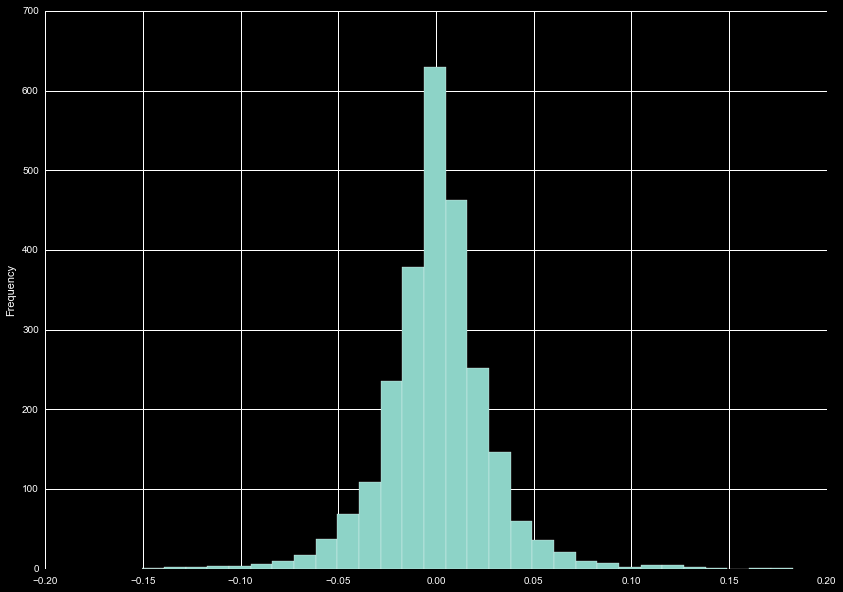

In [8]:
bar['close'].plot.hist( bins=30 )

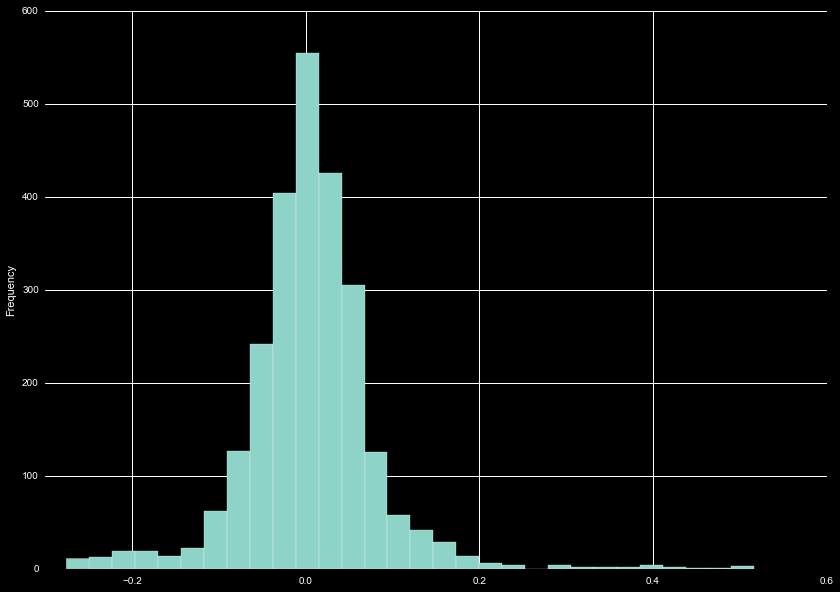

In [10]:
bar['close_mean_10'].plot.hist( bins=30 )

In [10]:
bar['close_mean_10'].describe()

count    2519.000000
mean        0.000119
std         0.043170
min        -0.198986
25%        -0.020342
50%         0.000610
75%         0.020640
max         0.197616
Name: close_mean_10, dtype: float64

/home/sean/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


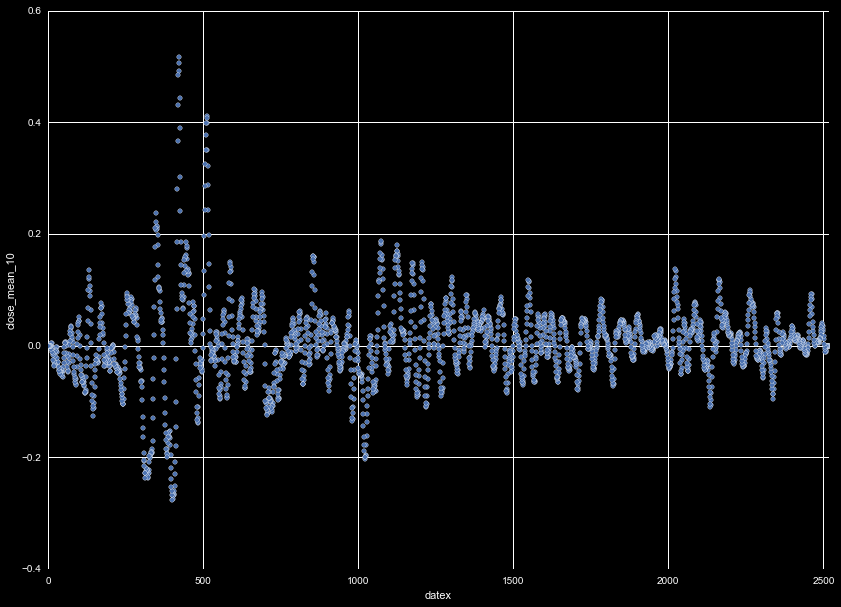

In [11]:
foobar = bar.copy()
foobar['datex'] = np.arange( bar.shape[0], 0, -1 )
foobar.plot.scatter( x='datex', 
                     y='close_mean_10', 
                     xlim=[0,bar.shape[0]] )

In [12]:
foobar = bar.join( diffs, how='inner' )

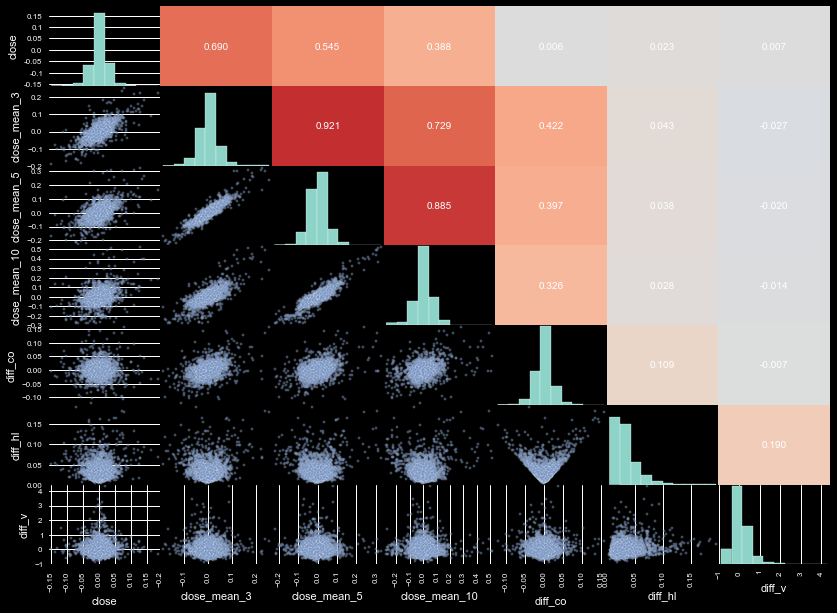

In [13]:
dv.corr_plot( foobar, corr_method = 'pearson')

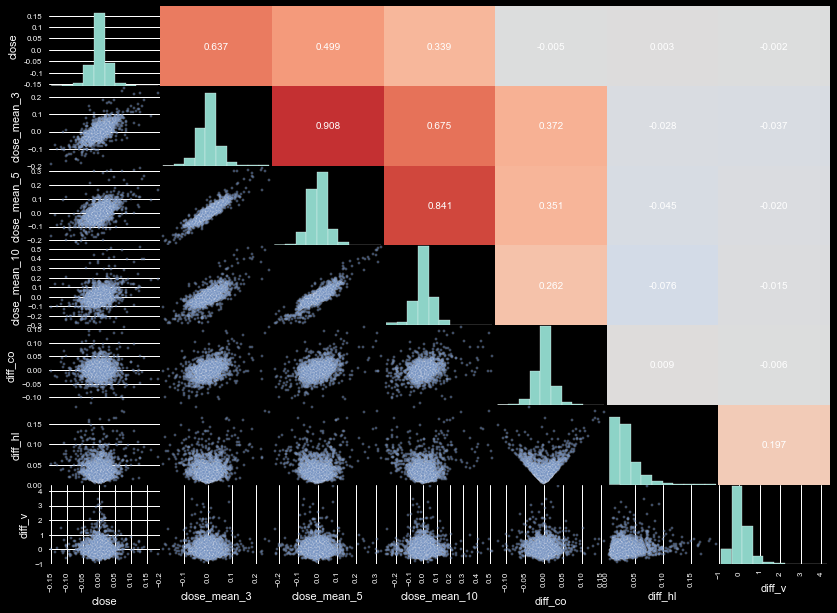

In [14]:
dv.corr_plot( foobar )

In [15]:
print diffs.corrwith( bar['close']         )
print diffs.corrwith( bar['close_mean_3']  )
print diffs.corrwith( bar['close_mean_5']  )
print diffs.corrwith( bar['close_mean_10'] )

diff_co    0.005809
diff_hl    0.022979
diff_v     0.006521
dtype: float64
diff_co    0.421903
diff_hl    0.043302
diff_v    -0.026714
dtype: float64
diff_co    0.397466
diff_hl    0.037686
diff_v    -0.019932
dtype: float64
diff_co    0.325634
diff_hl    0.028410
diff_v    -0.014098
dtype: float64


In [16]:
# Diffs appear to be useful

In [17]:
foobar = bar.join( moms, how='inner' )

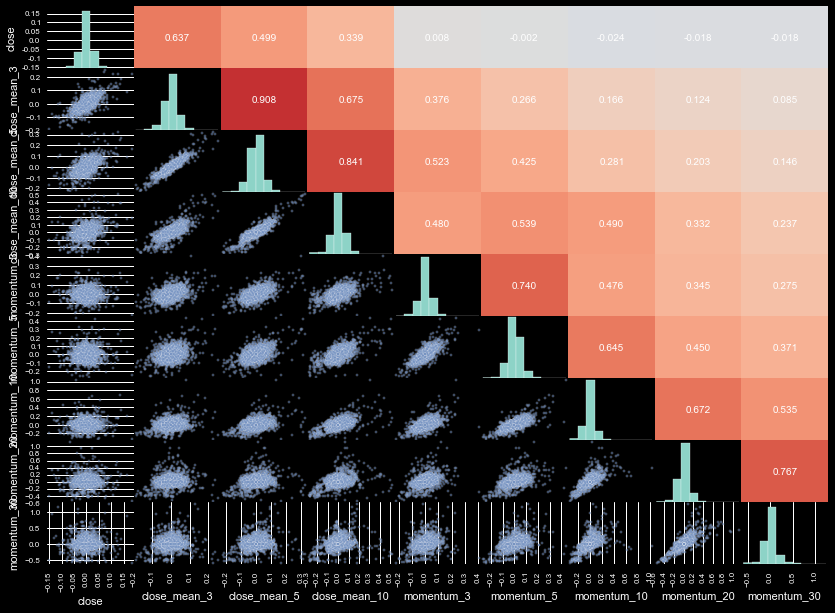

In [18]:
dv.corr_plot( foobar )

In [19]:
print moms.corrwith( bar['close']         )
print moms.corrwith( bar['close_mean_3']  )
print moms.corrwith( bar['close_mean_5']  )
print moms.corrwith( bar['close_mean_10'] )

momentum_3     0.009060
momentum_5     0.009802
momentum_10    0.030400
momentum_20    0.011262
momentum_30    0.008025
dtype: float64
momentum_3     0.408154
momentum_5     0.319492
momentum_10    0.256417
momentum_20    0.160882
momentum_30    0.124530
dtype: float64
momentum_3     0.574824
momentum_5     0.502173
momentum_10    0.384928
momentum_20    0.248964
momentum_30    0.184402
dtype: float64
momentum_3     0.549203
momentum_5     0.626886
momentum_10    0.577787
momentum_20    0.383722
momentum_30    0.269198
dtype: float64


In [20]:
# Momentum 3 5 and 10 do decent job

In [21]:
foobar = bar.join( rsi, how='inner' )

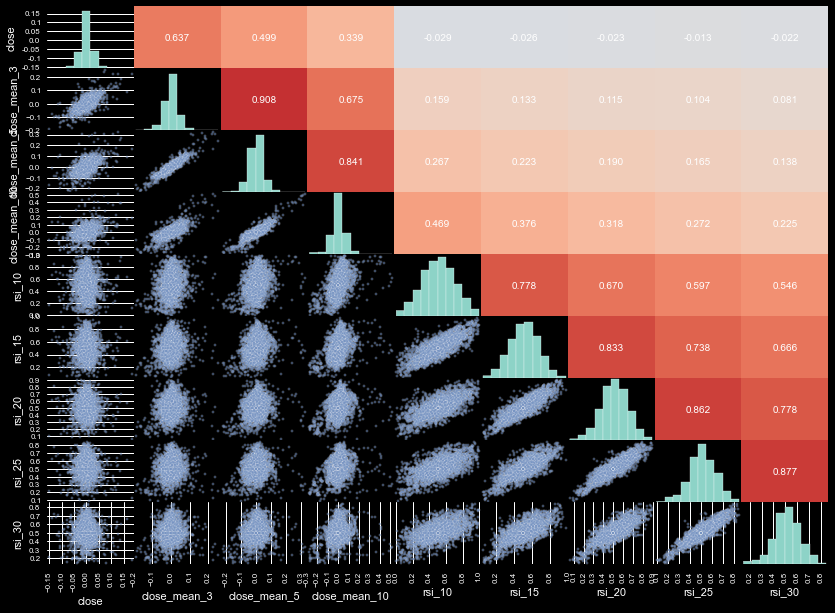

In [22]:
dv.corr_plot( foobar )

In [23]:
print rsi.corrwith( bar['close']         )
print rsi.corrwith( bar['close_mean_3']  )
print rsi.corrwith( bar['close_mean_5']  )
print rsi.corrwith( bar['close_mean_10'] )

rsi_10   -0.002520
rsi_15   -0.004777
rsi_20   -0.001289
rsi_25   -0.004532
rsi_30   -0.006754
dtype: float64
rsi_10    0.187147
rsi_15    0.156582
rsi_20    0.135804
rsi_25    0.115200
rsi_30    0.099353
dtype: float64
rsi_10    0.296139
rsi_15    0.246776
rsi_20    0.212729
rsi_25    0.181780
rsi_30    0.154198
dtype: float64
rsi_10    0.457157
rsi_15    0.374975
rsi_20    0.323639
rsi_25    0.277517
rsi_30    0.230926
dtype: float64


In [24]:
# RSI 10, 15 good

In [25]:
foobar = bar.join( bands, how='inner' )

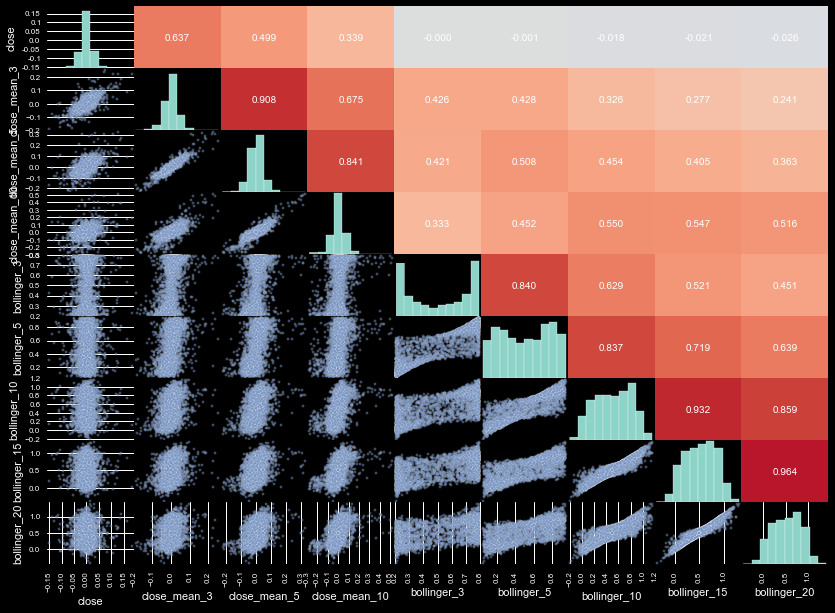

In [26]:
dv.corr_plot( foobar )

In [27]:
print bands.corrwith( bar['close']         )
print bands.corrwith( bar['close_mean_3']  )
print bands.corrwith( bar['close_mean_5']  )
print bands.corrwith( bar['close_mean_10'] )

bollinger_3     0.004826
bollinger_5     0.004749
bollinger_10   -0.007047
bollinger_15   -0.008756
bollinger_20   -0.009058
dtype: float64
bollinger_3     0.395727
bollinger_5     0.398115
bollinger_10    0.320699
bollinger_15    0.282049
bollinger_20    0.252377
dtype: float64
bollinger_3     0.398073
bollinger_5     0.473995
bollinger_10    0.439393
bollinger_15    0.401252
bollinger_20    0.366697
dtype: float64
bollinger_3     0.316422
bollinger_5     0.415583
bollinger_10    0.498623
bollinger_15    0.497892
bollinger_20    0.478375
dtype: float64


In [128]:
# bollinger_3, 5, 10, 15 - all good for predictive means around that number of days